In [135]:
from sklearn import datasets
import numpy as np

In [136]:
# loading dataset
iris = datasets.load_iris()

In [137]:
# looking at features
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [138]:
# selecting 2 features
X = iris.data[:,[2,3]]

# target
y = iris.target

In [139]:
# unique labels
np.unique(y)

array([0, 1, 2])

#### `train test split`

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#  stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset

In [141]:
print('Labels counts in y:', np.bincount(y))

#Labels counts in y: [50 50 50]

print('Labels counts in y_train:', np.bincount(y_train))

#Labels counts in y_train: [35 35 35]

print('Labels counts in y_test:', np.bincount(y_test))

#Labels counts in y_test: [15 15 15]


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


#### `feature scaling` - is not necessary

In [142]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)

In [143]:
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

X_train_std = X_train
X_test_std =  X_test


#### `training the model`

##### Most algorithms in scikit-learn already support multiclass classification by default via the one-versus-rest (OvR) method

In [144]:
from sklearn.tree import DecisionTreeClassifier

# decision tree with a maximum depth of 4, using the Gini impurity as a criterion for impurity
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)

In [145]:
tree_model.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

#### `Making prediction on test set`

In [146]:
y_pred = tree_model.predict(X_test_std)

In [147]:
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [148]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [149]:
print(f'Misclassified error %: {100*(y_test != y_pred).sum()/len(y_test)}')

Misclassified error %: 2.2222222222222223


In [150]:
print(f'Classification accuracy %: {100*(1-(y_test != y_pred).sum()/len(y_test))}')

Classification accuracy %: 97.77777777777777


In [151]:
# sklearn implementation of accuracy
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9777777777777777


In [152]:
# Also each classifier comes with score in sklearn
print(f'Accuracy: {tree_model.score(X_test_std, y_test)}')

Accuracy: 0.9777777777777777


#### `Plotting it`

In [153]:
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,

                          resolution=0.02):

    # setup marker generator and color map

    markers = ('o', 's', '^', 'v', '<')

    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),

                           np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())

    plt.ylim(xx2.min(), xx2.max())

    # plot class examples

    for idx, cl in enumerate(np.unique(y)):

        plt.scatter(x=X[y == cl, 0],

                    y=X[y == cl, 1],

                    alpha=0.8,

                    c=colors[idx],

                    marker=markers[idx],

                    label=f'Class {cl}',

                    edgecolor='black')

    # highlight test examples

    if test_idx:

        # plot all examples

        X_test, y_test = X[test_idx, :], y[test_idx]

        

        plt.scatter(X_test[:, 0], X_test[:, 1],

                    c='none', edgecolor='black', alpha=1.0,

                    linewidth=1, marker='o',

                    s=100, label='Test set')


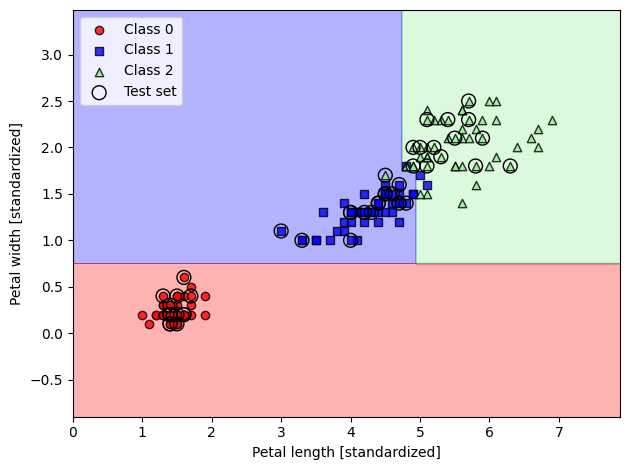

In [154]:
X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std,y=y_combined,classifier=tree_model,test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')

plt.ylabel('Petal width [standardized]')

plt.legend(loc='upper left')

plt.tight_layout()

plt.show()


#### we can also visualize the tree after training the model

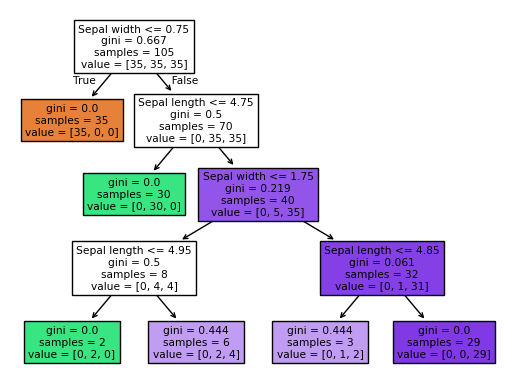

In [155]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width','Petal length', 'Petal width']

tree.plot_tree(tree_model,feature_names=feature_names,filled=True)

plt.show()


##### 

Looking at the root node, it starts with 105 examples at the top. The first split uses a sepal width cut-off ≤ 0.75 cm for splitting the root node into two child nodes with 35 examples (left child node) and 70 examples (right child node). After the first split, we can see that the left child node is already pure and only contains examples from the Iris-setosa class (Gini impurity = 0). The further splits on the right are then used to separate the examples from the Iris-versicolor and Iris-virginica class.

Looking at this tree, and the decision region plot of the tree, we can see that the decision tree does a very good job of separating the flower classes. Unfortunately, scikit-learn currently does not implement functionality to manually post-prune a decision tree. However, we could go back to our previous code example, change the max_depth of our decision tree to 3, and compare it to our current model, but we leave this as an exercise for the interested reader.